In [88]:
from standard_imports import *
import os

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
def save_unique_npz(directory, file_name, **data):
    base_path = os.path.join(directory,file_name)
    filename = f"{base_path}_{{}}.npz"
    counter = 0
    while os.path.exists(filename.format(counter)):
        counter += 1
        
    np.savez(filename.format(counter), **data)

In [90]:
def derivative_directory(d_vec, ML, n_max, alpha, cutoff, cutoff_high):
    data = np.load(file_location(d_vec, ML))
    zeros = data['zeros']

    derivative_array = np.zeros((len(zeros) , n_max))

    for i in tqdm(range(len(zeros))):
        #4e4 is more enough if we want error of 10^-8 at alpha = 0.01
        derivative_array[i] = derivative(n_max, d_vec, zeros[i], alpha, cutoff, ML, cutoff_high )


    ############Saves Data#####################
    Path("derivatives").mkdir( exist_ok=True)
    directory = "derivatives/ML_{}/".format(ML)
    Path(directory).mkdir( exist_ok=True)
    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    Path(directory+folder_name).mkdir( exist_ok=True)

    metadata = {"d_vec": d_vec, "ML": ML, "n_max": n_max, "cutoff": cutoff, "cutoff_high": cutoff_high, "alpha": alpha}

    save_unique_npz(directory + folder_name,  "data", dervatives = derivative_array, metadata = metadata, zeros = zeros)

    return derivative_array, metadata, zeros



In [91]:
d_vec = np.array([0,0,0])
ML = 4
cutoff = 4e4

cutoff_high = 1e6
alpha = 0.01
n_max = 3



ds = np.array([[1,0,0],[1,1,0]])

for i in range(len(ds)):
    d_vec = ds[i]
    derivative_directory(d_vec, ML, n_max, alpha, cutoff, cutoff_high)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [02:06<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_51382/793779824.py", line 15, in <module>
    derivative_directory(d_vec, ML, n_max, alpha, cutoff, cutoff_high)
  File "/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_51382/3050078927.py", line 9, in derivative_directory
    derivative_array[i] = derivative(n_max, d_vec, zeros[i], alpha, cutoff, ML, cutoff_high )
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py", line 213, in derivative
    FV_matrix[i,j] = deltaFV(i,j,d_vec, x, cutoff, alpha, ML, cutoff_high)
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py", line 184, in deltaFV
    retur

In [87]:
d_vec = np.array([2,0,0])
ML = 4
cutoff = 1e5

cutoff_high = 1e5
alpha = 0.01
n_max = 1



derivative_directory(d_vec, ML, n_max, alpha, cutoff, cutoff_high)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [01:00<00:00,  3.03s/it]


(array([[  14.18364986],
        [  28.16107342],
        [  35.87613256],
        [ 172.09784702],
        [  34.79461579],
        [ 147.28369836],
        [  24.36366163],
        [ 260.42366208],
        [  98.22649398],
        [ 741.39613432],
        [ 149.90080364],
        [ 153.22834038],
        [  19.41776785],
        [ 108.72938218],
        [3077.86261726],
        [ 143.93774199],
        [ 343.81296096],
        [1655.95008826],
        [ 781.06573712],
        [  71.4990855 ]]),
 {'d_vec': array([2, 0, 0]),
  'ML': 4,
  'n_max': 1,
  'cutoff': 100000.0,
  'cutoff_high': 100000.0,
  'alpha': 0.01},
 array([0.24837022, 0.72481219, 1.25677597, 1.90121709, 2.3896478 ,
        3.0340277 , 3.47233771, 4.0761681 , 4.52071136, 4.9183471 ,
        5.22926579, 5.63025898, 6.88235512, 7.7384732 , 8.02838558,
        8.15683669, 8.76696127, 8.9655247 , 9.07422555, 9.55364896]))

In [57]:
np.load("derivatives/ML_6/d_002/data_0.npz" ['metadata'].item()

{'d_vec': array([0, 0, 2]),
 'ML': 6,
 'n_max': 3,
 'cutoff': 40000.0,
 'cutoff_high': 200000.0,
 'alpha': 0.01}

In [61]:
from stability_analysis import * 

100%|██████████| 20/20 [3:18:41<00:00, 596.09s/it]


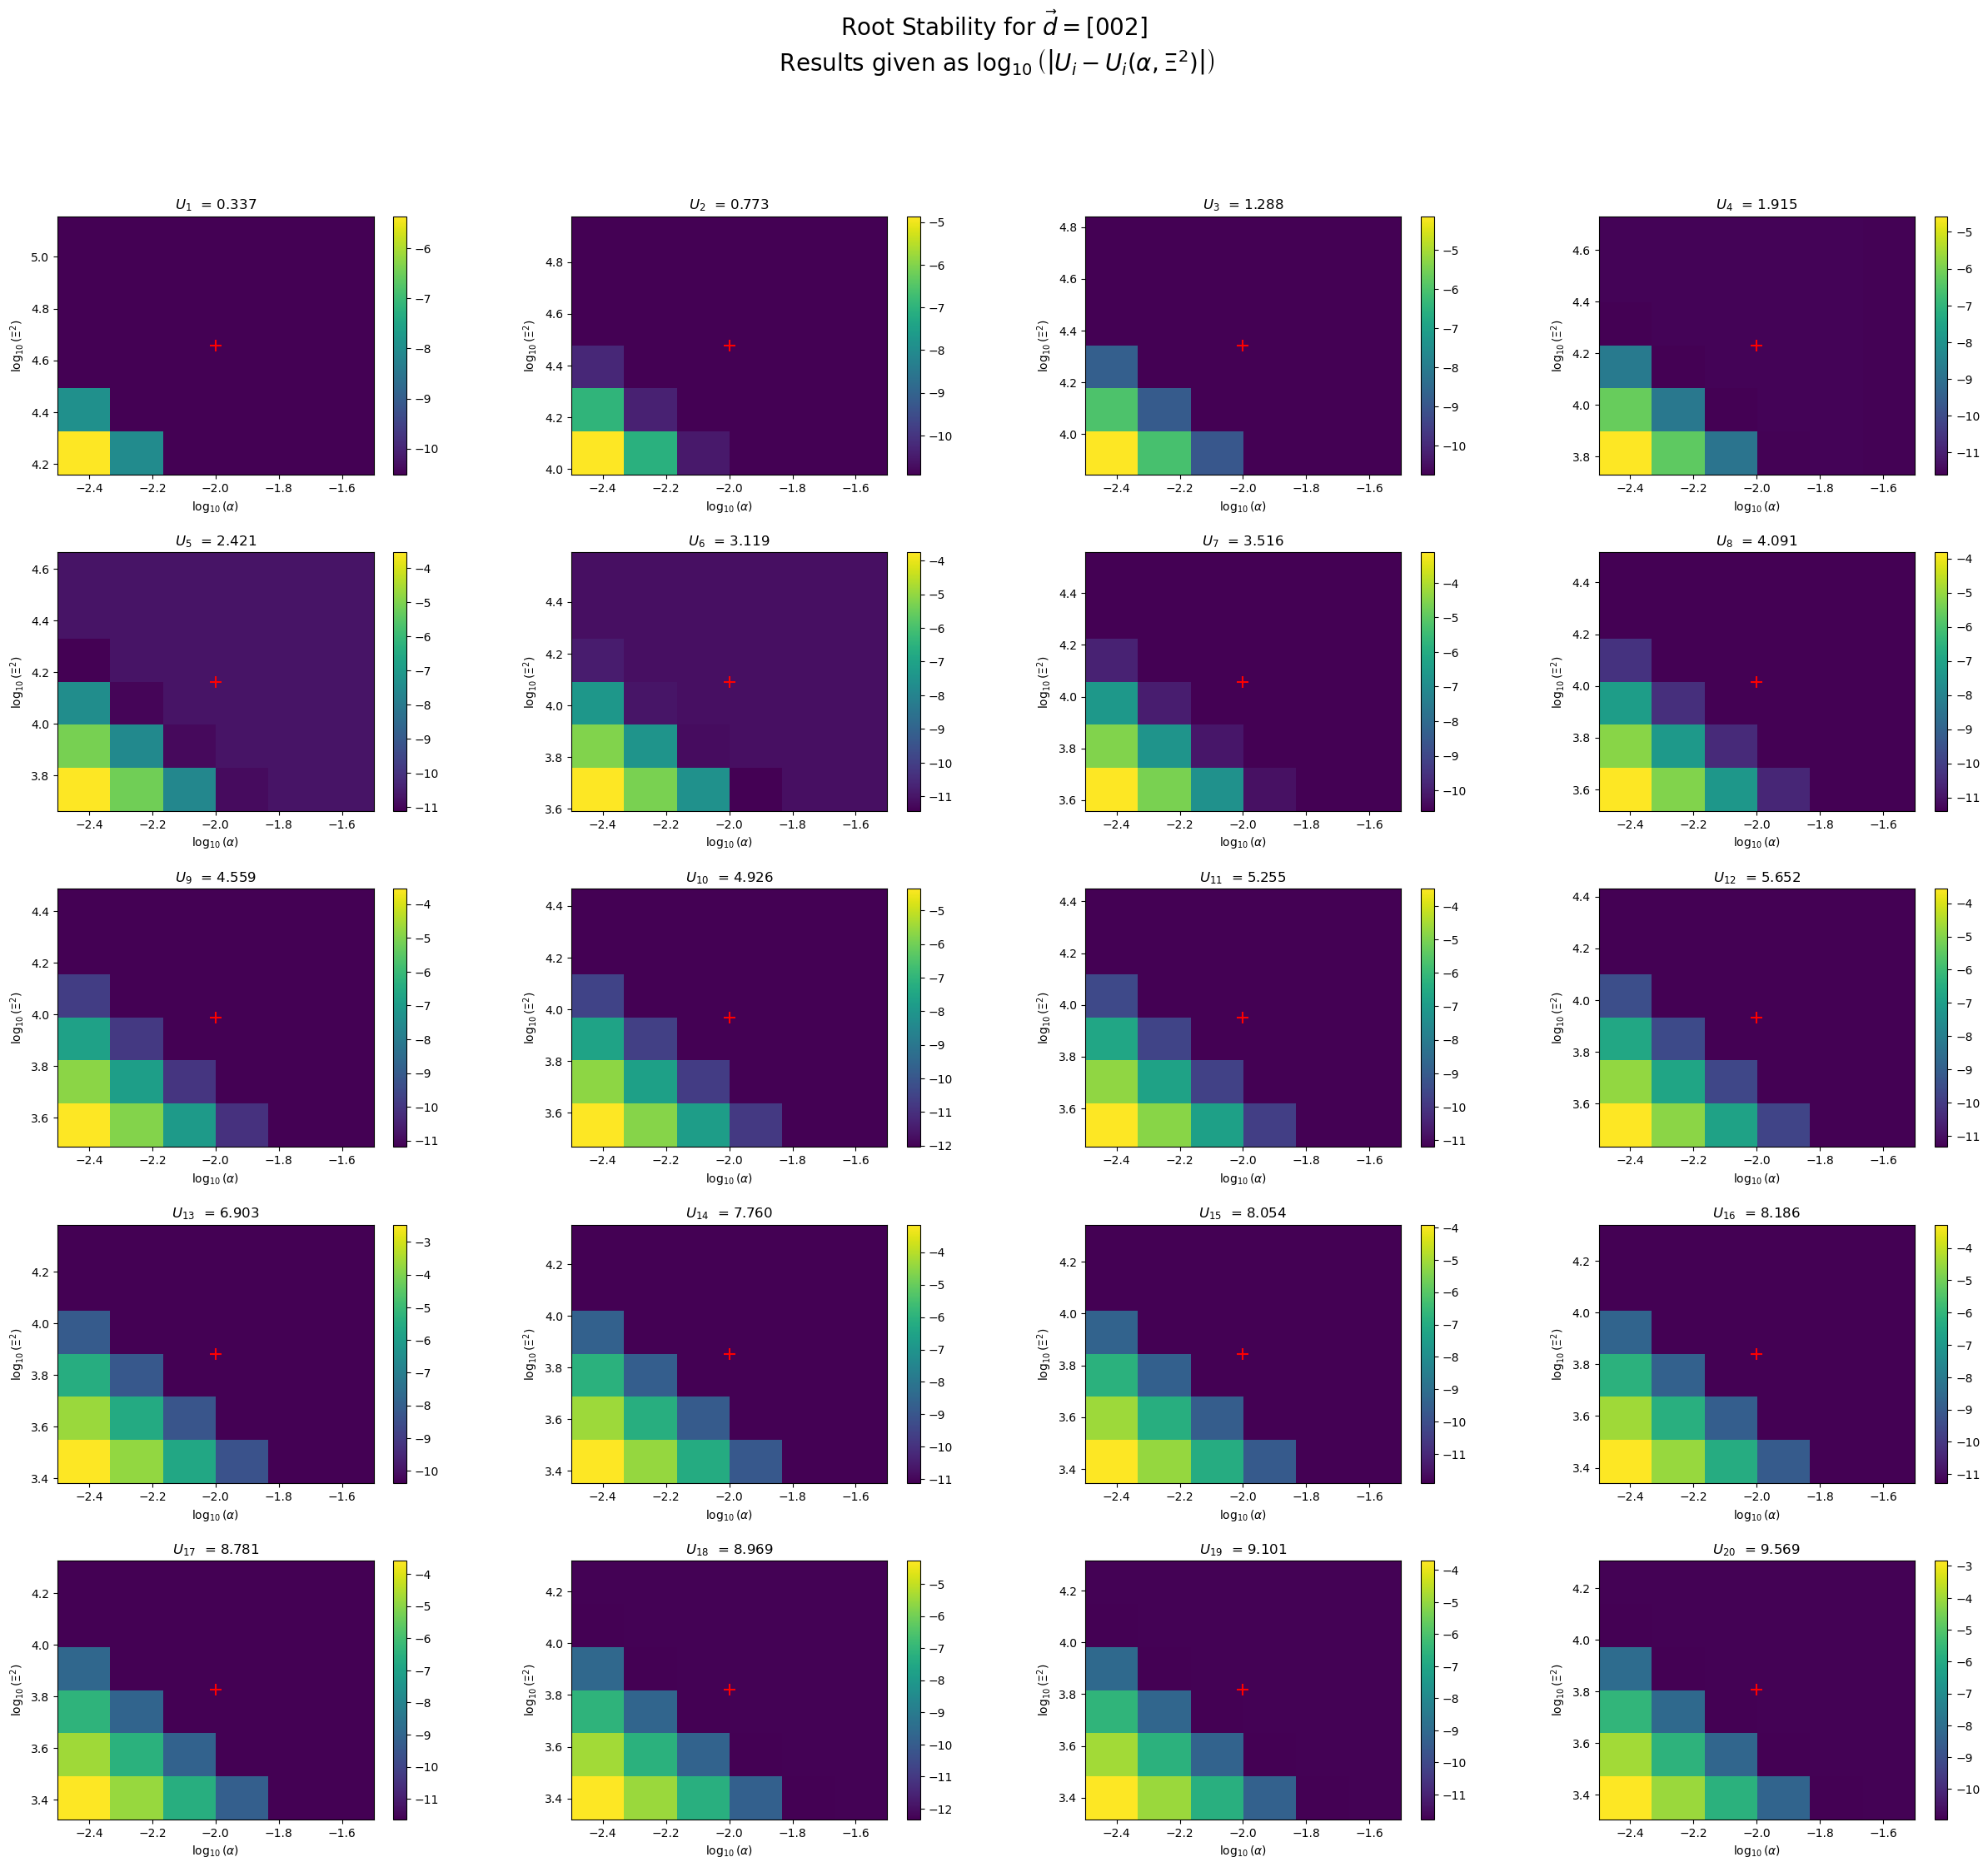

In [79]:

d_vec = np.array([0,0,2])
ML = 6
alpha = 0.01
resolution = 6


stability_analysis(d_vec, alpha, resolution, ML)